Mean Absolute Percentage Error (MAPE): 6.82%
Mean Absolute Error: 31.58
Mean Squared Error: 1485.20
Root Mean Squared Error: 38.54
R-squared: 0.84


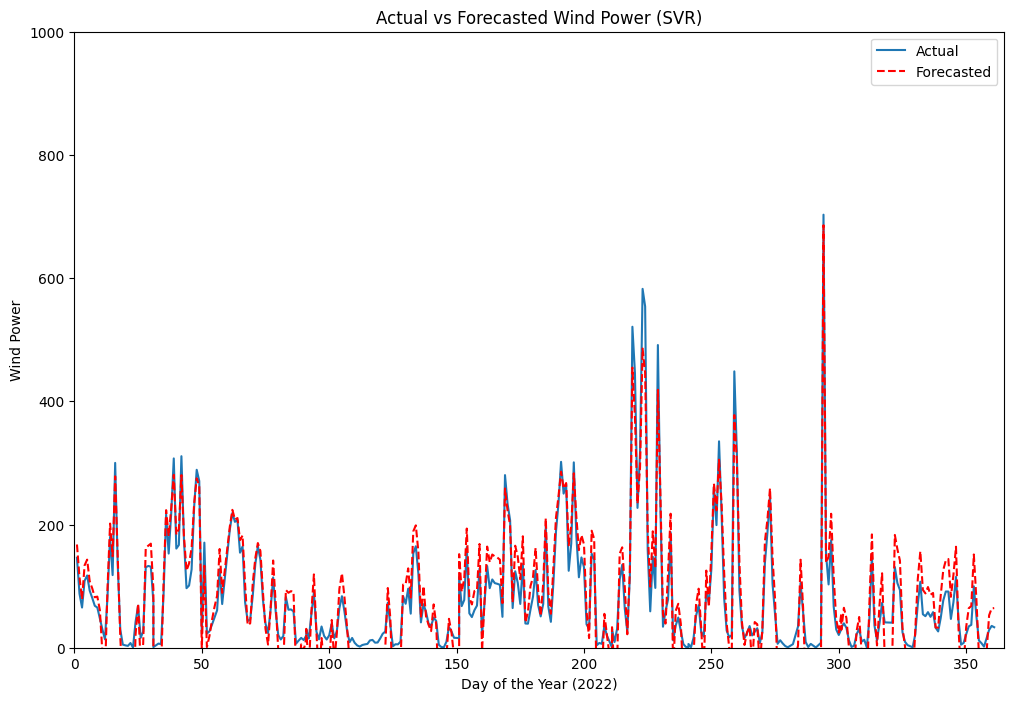

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv('/content/Inani_daily_avg_power.csv')
# Preprocessing: Removing zero values from Avg_Power
df = df[df['Avg_Power'] != 0]

# Features and target variable
features = ['YEAR', 'MO', 'DY', 'Avg_WS50M']
target = 'Avg_Power'

# Ensure 'DY' values are from 1 to 365
df['DY'] = (df['MO'] - 1) * 30 + df['DY']


# Splitting the data into training and test sets
train_df = df[df['YEAR'] <= 2021]  # Training data: 2013-2021
test_df = df[df['YEAR'] == 2022]   # Test data: 2022

# Define X and y for training and testing
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Initialize SVR model
svr_model = SVR(kernel='linear', C=10, gamma='auto')  # You can change the kernel and other hyperparameters

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svr_model.predict(X_test)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae:.2f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

# Calculate R-squared
r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2:.2f}")

# Plot the actual and forecast values
plt.figure(figsize=(12,8))
plt.plot(test_df['DY'], y_test, label='Actual')
plt.plot(test_df['DY'], predictions, label='Forecasted',color = 'red',linestyle = '--')
plt.xlabel('Day of the Year (2022)')
plt.ylabel('Wind Power')
plt.title('Actual vs Forecasted Wind Power (SVR)')
plt.legend()
plt.grid(False)

# Set plot limits to start from 0 on both axes
plt.xlim(0, 365)
plt.ylim(0, 1000)
#plt.ylim(0, max(max(y_test), max(predictions)))

plt.show()
